In [11]:
from graph_agent import GraphAgent
from  pprint import pprint
from IPython.display import display, Markdown, clear_output
import time
%reload_ext autoreload
%autoreload 2

In [2]:
graph_agent = GraphAgent()
#graph_agent.create_vector_db()

[03:56:26 +0000] [INFO]: Graph 'OPEN_INTELLIGENCE' exists.
[03:56:27 +0000] [INFO]: Default node type set to 'Actor'


In [ ]:
graph_agent.arango_graph.schema

{'Graph Schema': [{'graph_name': 'OPEN_INTELLIGENCE',
   'edge_definitions': [{'edge_collection': 'eventActor',
     'from_vertex_collections': ['Event'],
     'to_vertex_collections': ['Actor']},
    {'edge_collection': 'hasLocation',
     'from_vertex_collections': ['Event'],
     'to_vertex_collections': ['Location']},
    {'edge_collection': 'hasSource',
     'from_vertex_collections': ['Event'],
     'to_vertex_collections': ['Source']},
    {'edge_collection': 'inCountry',
     'from_vertex_collections': ['Location'],
     'to_vertex_collections': ['Country']},
    {'edge_collection': 'inRegion',
     'from_vertex_collections': ['Country'],
     'to_vertex_collections': ['Region']},
    {'edge_collection': 'subClass',
     'from_vertex_collections': ['Class'],
     'to_vertex_collections': ['Class']},
    {'edge_collection': 'type',
     'from_vertex_collections': ['Event'],
     'to_vertex_collections': ['Class']}]}],
 'Collection Schema': [{'collection_name': 'hasLocation',
   

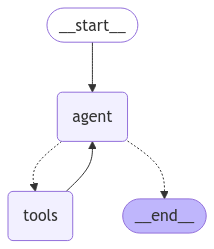

In [4]:
from IPython.display import Image, display
Image(graph_agent.agent.get_graph().draw_mermaid_png())

In [15]:
# index the vector db
#graph_agent.create_vector_db()
# load from persisted vector db
graph_agent.load_vector_db()

In [5]:
graph_agent.agent.__dict__

{'nodes': {'__start__': <langgraph.pregel.read.PregelNode at 0x7f5d29b8c6d0>,
  'agent': <langgraph.pregel.read.PregelNode at 0x7f5d29baef50>,
  'tools': <langgraph.pregel.read.PregelNode at 0x7f5d29b990d0>},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x7f5d29bae980>,
  'structured_response': <langgraph.channels.last_value.LastValue at 0x7f5d4ab30940>,
  'is_last_step': langgraph.managed.is_last_step.IsLastStepManager,
  'remaining_steps': langgraph.managed.is_last_step.RemainingStepsManager,
  '__start__': <langgraph.channels.ephemeral_value.EphemeralValue at 0x7f5d29b6eb80>,
  'agent': <langgraph.channels.ephemeral_value.EphemeralValue at 0x7f5d4ab322c0>,
  'tools': <langgraph.channels.ephemeral_value.EphemeralValue at 0x7f5d29bad040>,
  'branch:__start__:__self__:agent': <langgraph.channels.ephemeral_value.EphemeralValue at 0x7f5d4ab310c0>,
  'branch:__start__:__self__:tools': <langgraph.channels.ephemeral_value.EphemeralValue at 0x7f5d7e9e3bc0>,


In [22]:
queries = [ "Who are you? how many tools are available?",
           "How many countries are there in the graph?",
           "What is the most impactful node of type event in the graph? Explain why",
           "How many different types of nodes and connections are there in the graph?",
           "How many nodes and connections are there in the graph?",
           "Tell me more about journalists being attacked in Kenya?",
           "what events are related to Mugendo hill?",
           ]


In [24]:
for query in queries:
    #clear_output()
    display(Markdown(f'<span style="color:yellow">**{query}**</span>'))
    pprint(graph_agent.query_graph(query))
    time.sleep(5)

<span style="color:yellow">**Who are you? how many tools are available?**</span>

("I'm a graph agent designed to help you interact with our graph database "
 'using various tools. Currently, there are 4 available tools:\n'
 '\n'
 '1. whoami – provides an overview of the database collections and graph '
 'schema.\n'
 '2. vector_qa – executes a semantic vector search across nodes.\n'
 "3. aql_qa – translates natural language queries into AQL (ArangoDB's query "
 'language) and returns the results.\n'
 '4. nx_algorithm_coding_qa – runs specific NetworkX graph algorithms (like '
 'traversals or shortest path searches) on the ArangoDB graph.\n'
 '\n'
 'How can I assist you further?')


<span style="color:yellow">**How many countries are there in the graph?**</span>



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Country
RETURN LENGTH(
  FOR country IN Country
    RETURN 1
)

AQL Result:
[22]

> Finished chain.
'The graph contains 22 country records.'


<span style="color:yellow">**What is the most impactful node of type event in the graph? Explain why**</span>



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Event, eventActor, hasLocation, hasSource, type

FOR e IN Event
    LET degree = 
        LENGTH(FOR v IN ANY e eventActor RETURN 1) +
        LENGTH(FOR v IN ANY e hasLocation RETURN 1) +
        LENGTH(FOR v IN ANY e hasSource RETURN 1) +
        LENGTH(FOR v IN ANY e type RETURN 1)
    SORT degree DESC
    LIMIT 1
    RETURN { event: e, degree: degree }

AQL Result:
[{'event': {'_key': 'ANG1623', '_id': 'Event/ANG1623', '_rev': '_jQCni-e-_v', 'date': '1999-08-16T00:00:00.000Z', 'dateStamp': 934761600000, 'description': '16/8/1999 ,Kuvango, Publico (Portugal), Battles, Military Forces of Angola (1975-), UNITA: National Union for the Total Independence of Angola', 'fatalities': 0, 'geo': {'type': 'Point', 'coordinates': [-14.467, 16.3]}, 'name': 'Kuvango, Publico (Portugal), B', 'label': 'Battles'}, 'degree': 5}]

> Finished chain.
('The analysis shows that the event on August 16, 1999, is the most impactful '
 'one. It 

<span style="color:yellow">**How many different types of nodes and connections are there in the graph?**</span>



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Event, Actor, Location, Source, Country, Region, Class, eventActor, hasLocation, hasSource, inCountry, inRegion, subClass, type
LET nodeTypes = ["Event", "Actor", "Location", "Source", "Country", "Region", "Class"]
LET edgeTypes = ["eventActor", "hasLocation", "hasSource", "inCountry", "inRegion", "subClass", "type"]
RETURN {
  nodeTypeCount: LENGTH(nodeTypes),
  nodeTypes: nodeTypes,
  edgeTypeCount: LENGTH(edgeTypes),
  edgeTypes: edgeTypes
}

AQL Result:
[{'nodeTypeCount': 7, 'nodeTypes': ['Event', 'Actor', 'Location', 'Source', 'Country', 'Region', 'Class'], 'edgeTypeCount': 7, 'edgeTypes': ['eventActor', 'hasLocation', 'hasSource', 'inCountry', 'inRegion', 'subClass', 'type']}]

> Finished chain.
('The graph contains 7 different types of nodes, which are: Event, Actor, '
 'Location, Source, Country, Region, and Class. It also includes 7 distinct '
 'types of connections (relationships), which are: eventActor, hasLoca

<span style="color:yellow">**How many nodes and connections are there in the graph?**</span>



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Event, Actor, Location, Source, Class, Country, Region, eventActor, hasLocation, hasSource, inCountry, inRegion, subClass, type
LET nodeCount = 
  LENGTH(
    FOR doc IN Event RETURN 1
  ) +
  LENGTH(
    FOR doc IN Actor RETURN 1
  ) +
  LENGTH(
    FOR doc IN Location RETURN 1
  ) +
  LENGTH(
    FOR doc IN Source RETURN 1
  ) +
  LENGTH(
    FOR doc IN Class RETURN 1
  ) +
  LENGTH(
    FOR doc IN Country RETURN 1
  ) +
  LENGTH(
    FOR doc IN Region RETURN 1
  )
LET edgeCount =
  LENGTH(
    FOR doc IN eventActor RETURN 1
  ) +
  LENGTH(
    FOR doc IN hasLocation RETURN 1
  ) +
  LENGTH(
    FOR doc IN hasSource RETURN 1
  ) +
  LENGTH(
    FOR doc IN inCountry RETURN 1
  ) +
  LENGTH(
    FOR doc IN inRegion RETURN 1
  ) +
  LENGTH(
    FOR doc IN subClass RETURN 1
  ) +
  LENGTH(
    FOR doc IN type RETURN 1
  )
RETURN { nodes: nodeCount, connections: edgeCount }

AQL Result:
[{'nodes': 80047, 'connections': 32181

<span style="color:yellow">**Tell me more about journalists being attacked in Kenya?**</span>

('Several documented incidents in Kenya highlight troubling patterns of '
 'violence against journalists:\n'
 '\n'
 '• In January 2013, during a political clash in Kibera, police assaulted '
 'journalists who were on the scene to cover the event. This incident '
 'underscores the risks faced by media personnel when reporting on volatile '
 'political situations.\n'
 '\n'
 '• On October 31, 2017, in Nairobi, two journalists were assaulted by youth '
 'during a NASA Parliamentary Group meeting at the Wiper headquarters. The '
 'attack appeared to be motivated by the journalists’ association with '
 'specific media outlets, marking the incident as politically charged.\n'
 '\n'
 '• An earlier event took place on January 8, 2007 in Kibaki, where a '
 'journalist was attacked while taking routine photographs of President Kibaki '
 'during a mass event. This incident suggests that even standard '
 'news-gathering activities can provoke violence under certain circumstances.\n'
 '\n'
 '• Moreov

<span style="color:yellow">**what events are related to Mugendo hill?**</span>



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Event
FOR event IN Event
    FILTER CONTAINS(event.description, 'Mugendo hill')
    RETURN event

AQL Result:
[{'_key': 'BUR3518', '_id': 'Event/BUR3518', '_rev': '_jQCnece-_D', 'date': '2015-06-06T00:00:00.000Z', 'dateStamp': 1433548800000, 'description': 'On Mugendo hill, two members of CNDD-FDD were stabbed; one of them died on the spot, while the other was seriously injured in the attacked. Alliance "Espoir des Burundais" were responsible for the attack.', 'fatalities': 1, 'geo': {'type': 'Point', 'coordinates': [-2.518, 29.991]}, 'name': 'On Mugendo hill, two members o', 'label': 'Violence_against_civilians'}, {'_key': 'BUR8472', '_id': 'Event/BUR8472', '_rev': '_jQCnepW-_F', 'date': '2018-08-27T00:00:00.000Z', 'dateStamp': 1535328000000, 'description': 'A man from Mugendo hill of Muhuta area in Rumonge province was stoned by residents of the hill on August 27, 2018. The assailants accused him of having killed a woma

In [24]:
response, retrieved_nodes = graph_agent.vector_qa("tell me more about journalists being attacked in Kenya? use vector search")

In [25]:
print(response)
display(retrieved_nodes)

Below are several Kenya‐related events from the context where journalists were attacked or assaulted:

• KEN3613 – “Police assault journalists cov”: Journalists covering a political clash in Kibera were assaulted by police on January 20, 2013.  
• KEN5879 – “2 journalists were assaulted b”: In Nairobi on October 31, 2017, two journalists were assaulted by youth during a NASA Parliamentary Group meeting at the Wiper headquarters, following prior verbal abuse.  
• KEN1738 – “Journalist attacked for taking”: On January 8, 2007, a journalist was attacked while taking standard photos of Kibaki during a mass event.  
• KEN5132 – “A journalist was seriously bea”: In western Kenya on July 21, 2016, during a rally for opposition leader Raila Odinga, a journalist was seriously beaten and injured before police intervened.

Sources:  
KEN3613 – "Police assault journalists cov"  
KEN5879 – "2 journalists were assaulted b"  
KEN1738 – "Journalist attacked for taking"  
KEN5132 – "A journalist was se

,description,metadata,_relevance_score
0,Police assault journalists cov : Police assaul...,"['_key : KEN3613', 'date : 2013-01-20T00:00:00...",0.016393
1,Journalists in Northern Kenya : Journalists i...,"['_key : KEN4129', 'date : 2013-11-04T00:00:00...",0.016393
2,2 journalists were assaulted b : 2 journalists...,"['_key : KEN5879', 'date : 2017-10-31T00:00:00...",0.016129
3,About 100 journalists proteste : About 100 jou...,"['_key : BEN15', 'date : 2003-05-15T00:00:00.0...",0.016129
4,Journalist attacked for taking : Journalist at...,"['_key : KEN1738', 'date : 2007-01-08T00:00:00...",0.015873
5,Two journalists reported being : Two journalis...,"['_key : GHA174', 'date : 2013-03-06T00:00:00....",0.015873
6,A journalist was seriously bea : A journalist ...,"['_key : KEN5132', 'date : 2016-07-21T00:00:00...",0.015625
7,About 100 journalists marched : About 100 jou...,"['_key : BUR2895', 'date : 2011-05-03T00:00:00...",0.015625
8,Journalists attacked by Police : Journalists a...,"['_key : BUR3537', 'date : 2015-06-09T00:00:00...",0.015385
9,3 French journalists attacked : 3 French journ...,"['_key : CON298', 'date : 2009-07-14T00:00:00....",0.015385
